In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# === Path to your experiments directory ===
BASE_DIR = "../saved_models/cgan_hyperparam_runs"

# Loop through each experiment folder
for run_name in os.listdir(BASE_DIR):
    run_path = os.path.join(BASE_DIR, run_name)
    if not os.path.isdir(run_path):
        continue

    val_loss_path = os.path.join(run_path, "val_losses.csv")
    qpo_score_path = os.path.join(run_path, "qpo_scores.csv")

    if not os.path.exists(val_loss_path) or not os.path.exists(qpo_score_path):
        print(f"[SKIP] Missing logs in {run_name}")
        continue

    try:
        # Load logs
        val_df = pd.read_csv(val_loss_path)
        qpo_df = pd.read_csv(qpo_score_path)

        # Plot losses
        plt.figure(figsize=(10, 4))
        plt.plot(val_df['epoch'], val_df['val_gen_loss'],
                 label='Val Gen Loss', color='blue')
        plt.plot(val_df['epoch'], val_df['val_disc_loss'],
                 label='Val Disc Loss', color='orange')
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title(f"{run_name} - Validation Losses")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(os.path.join(run_path, "val_losses_plot.png"))
        plt.close()

        # Plot QPO score
        if 'epoch' in qpo_df.columns and 'disc_score' in qpo_df.columns:
            plt.figure(figsize=(10, 4))
            plt.plot(qpo_df['epoch'], qpo_df['disc_score'],
                     label='Discriminator Score on QPOs', color='green')
            plt.xlabel("Epoch")
            plt.ylabel("Score")
            plt.title(f"{run_name} - QPO Discriminator Score")
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.savefig(os.path.join(run_path, "qpo_score_plot.png"))
            plt.close()

        print(f"[OK] Plots saved for {run_name}")

    except Exception as e:
        print(f"[ERROR] Failed for {run_name}: {e}")

[OK] Plots saved for run_3_z64_lr0.0005_bs64
[OK] Plots saved for run_4_z64_lr0.0005_bs128
[OK] Plots saved for run_8_z100_lr0.0005_bs128
[OK] Plots saved for run_6_z100_lr0.001_bs128
[OK] Plots saved for run_7_z100_lr0.0005_bs64
[OK] Plots saved for run_5_z100_lr0.001_bs64
[OK] Plots saved for run_2_z64_lr0.001_bs128
[OK] Plots saved for run_1_z64_lr0.001_bs64


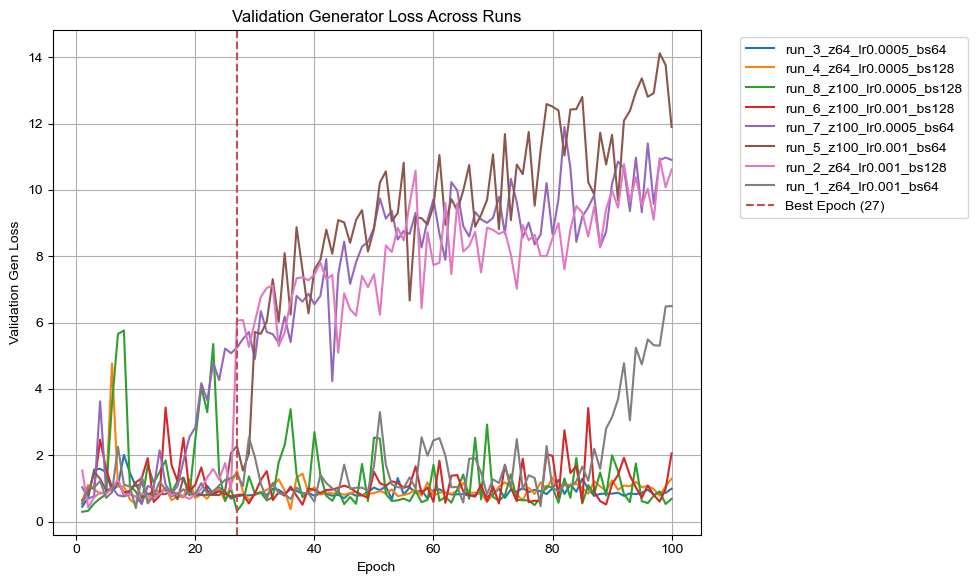

Best Hyperparameter Configuration:
Run Name     : run_8_z100_lr0.0005_bs128
Best Epoch   : 27
Val Gen Loss : 0.3193


In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Directory containing all experiment folders
base_dir = "../saved_models/cgan_hyperparam_runs"

# Variables to track best configuration
best_run = None
best_epoch = None
lowest_val_gen_loss = float("inf")

# Store all validation losses
all_runs_data = {}

# Loop over all runs
for run_name in os.listdir(base_dir):
    run_path = os.path.join(base_dir, run_name)
    val_loss_file = os.path.join(run_path, "val_losses.csv")

    if os.path.isfile(val_loss_file):
        df = pd.read_csv(val_loss_file)

        # Filter out early epochs for stability
        df_stable = df[df["epoch"] >= 10]
        if not df_stable.empty:
            min_loss_idx = df_stable["val_gen_loss"].idxmin()
            min_loss = df_stable.loc[min_loss_idx, "val_gen_loss"]
            min_epoch = df_stable.loc[min_loss_idx, "epoch"]

            all_runs_data[run_name] = df

            if min_loss < lowest_val_gen_loss:
                lowest_val_gen_loss = min_loss
                best_epoch = min_epoch
                best_run = run_name

# Plot all validation losses
plt.figure(figsize=(10, 6))
for run_name, df in all_runs_data.items():
    plt.plot(df["epoch"], df["val_gen_loss"], label=run_name)

if best_epoch:
    plt.axvline(x=best_epoch, color='r', linestyle='--', label=f"Best Epoch ({best_epoch})")

plt.title("Validation Generator Loss Across Runs")
plt.xlabel("Epoch")
plt.ylabel("Validation Gen Loss")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
sns.set(style="whitegrid")
plt.grid(True)
plt.tight_layout()
plt.show()

print("Best Hyperparameter Configuration:")
print(f"Run Name     : {best_run}")
print(f"Best Epoch   : {best_epoch}")
print(f"Val Gen Loss : {lowest_val_gen_loss:.4f}")
